# Computational Intelligence Course
## Exercise 2: Regression

### Basic description

FiveSixEight bar at Imperial College London launched a new app to assure the school that students going to the bar were ending up safely at home after attending the bar. The app tracks how many pints (or alcoholic drinks) each student has, and then asks the students in the morning whether they ended up safely in their own home. Students at Imperial are extremely honest, especially when they are hung over, so assume that all information from the app is valid.

### Task
Read the basic description and the questions in the document of this tutorial and then use the following notebook to try to answer to the 4 questions.

### Source code

Initially, import all necessary Python libraries.

In [55]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

Then, define the function that generates a list of random data points and saves it to your computer. We do not have real report from actual students so we'll use this function instead to generate data for 500 imaginary students.

In [56]:
def generate_data():
    data = np.zeros((500, 3))
    for i in range(len(data)):
        data[i, 0] = i
        data[i, 1] = random.randint(0, 24) / 2
        test = np.random.rand() - np.random.rand() / 5 - data[i, 1] ** 2 / 200
        if test > 0:
            data[i, 2] = 1

    np.save("data_regression_ex1.npy", data)

    return data

data = generate_data()

for d in data:
    if d[2] == 1:
        print(str(int(d[0]))+") With",d[1],"beers, this person made it home safely!")
    else:
        print(str(int(d[0]))+") With",d[1],"beers, this person didn't make it home..")

0) With 1.0 beers, this person made it home safely!
1) With 7.5 beers, this person didn't make it home..
2) With 7.0 beers, this person didn't make it home..
3) With 0.0 beers, this person made it home safely!
4) With 10.0 beers, this person didn't make it home..
5) With 0.5 beers, this person didn't make it home..
6) With 9.0 beers, this person made it home safely!
7) With 8.0 beers, this person made it home safely!
8) With 5.5 beers, this person made it home safely!
9) With 9.5 beers, this person made it home safely!
10) With 0.5 beers, this person made it home safely!
11) With 7.0 beers, this person made it home safely!
12) With 8.0 beers, this person didn't make it home..
13) With 10.5 beers, this person didn't make it home..
14) With 1.0 beers, this person made it home safely!
15) With 2.5 beers, this person made it home safely!
16) With 9.5 beers, this person made it home safely!
17) With 0.0 beers, this person made it home safely!
18) With 3.5 beers, this person made it home saf

384) With 10.0 beers, this person made it home safely!
385) With 2.5 beers, this person made it home safely!
386) With 8.0 beers, this person made it home safely!
387) With 11.5 beers, this person didn't make it home..
388) With 0.0 beers, this person made it home safely!
389) With 11.5 beers, this person didn't make it home..
390) With 2.0 beers, this person made it home safely!
391) With 11.5 beers, this person didn't make it home..
392) With 6.5 beers, this person made it home safely!
393) With 6.5 beers, this person didn't make it home..
394) With 4.0 beers, this person made it home safely!
395) With 4.0 beers, this person made it home safely!
396) With 5.5 beers, this person made it home safely!
397) With 4.0 beers, this person didn't make it home..
398) With 4.0 beers, this person made it home safely!
399) With 10.0 beers, this person made it home safely!
400) With 9.0 beers, this person didn't make it home..
401) With 12.0 beers, this person didn't make it home..
402) With 7.0 b

Define the formula of logistic regression, the method we'll be using in this example.

In [57]:
def logistic_eqn(x1, B0, B1):
    p = math.exp(B0 + B1 * x1) / (1 + math.exp(B0 + B1 * x1))
    return p


def compute_pred(features, theta):
    p_calc = np.zeros(len(data))
    for i in range(len(data)):
        p_calc[i] = logistic_eqn(features[i, 1], theta[0], theta[1])

    return p_calc

Define the function that loads this list of data points and implements regression, i.e. finds the best line that can fit this data.

In [58]:
def regression(data, theta):

    cost = np.zeros(num_iters)
    B0 = np.zeros(num_iters)
    B1 = np.zeros(num_iters)
    x1 = data[:, 1]
    target = data[:, 2]
    features = np.transpose(np.vstack([np.ones(len(x1)), x1]))
    
    for i in range(num_iters):
        B0[i] = theta[0]
        B1[i] = theta[1]

        predictions = compute_pred(features, theta)

        output_error_signal = target - predictions
        gradient = np.dot(np.transpose(features), output_error_signal)

        theta += learning_rate * gradient

        cost[i] = np.sum(output_error_signal ** 2) / (2 * len(data))

    return cost, B0, B1



### Train the algorithm 

Hint: Try changing the values of the three parameters (num_inters, theta and learning_rate) to see how the model is affected.

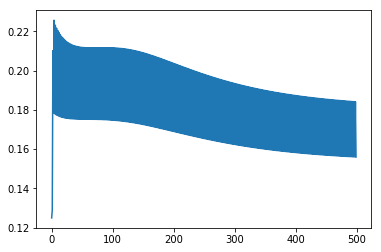

In [61]:
num_iters = 500                      # Number of iterations #
theta = [0, 0]                       # Theta: the parameter of the regression  #
learning_rate = 0.001             # Learning rate: How much each new data point will affect our optimization algorithm #

# If we have already generated and saved data, uncomment the next line
#data = np.load("data_regression_ex1.npy")
cost, B0, B1 = regression(data, theta)
plt.plot(range(num_iters),cost)
plt.show()

### Test our algorithm

By changing the variable num_beers, you will get different responses!

In [60]:
num_beers = 10                      # The number of beers

p = logistic_eqn(num_beers, B0[len(B0) - 1], B1[len(B1) - 1])
p = p * 100

print("If you have", num_beers, "beer(s), there is a", round(p,2), "percent chance you will make it home")

If you have 10 beer(s), there is a 91.26 percent chance you will make it home
